## ERDAP with erddapy example for PMEL TELOS platform data

***requires python 3.6*** for passing time information (pandas datetime to timestamp doesn't appear to work in 2.7)

### connecting and basic information

In [49]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np

import datetime

server_url = 'http://dunkel.pmel.noaa.gov:9290/erddap'

e = ERDDAP(server=server_url)

In [12]:
#df = pd.read_csv(e.get_search_url(response='csv', search_for='all'))
df = pd.read_csv(e.get_search_url(response='csv', search_for='TELOS'))

In [20]:
print('We have {} tabledap, {} griddap, and {} wms endpoints.\n'.format(
    len(set(df['tabledap'].dropna())),
    len(set(df['griddap'].dropna())),
    len(set(df['wms'].dropna()))
))
print('Datasets:\n{}'.format('\n'.join(df['Title'])))

We have 5 tabledap, 0 griddap, and 0 wms endpoints.

Datasets:
TELOS-1001 atrh170015
TELOS-1001 atrh170016
TELOS-1001 druck170004
TELOS-1001 paros170004
TELOS-1001 wind170013


In [14]:
df.groupby(['Institution']).groups

{'PMEL RUDICS': Int64Index([0, 1, 2, 3, 4], dtype='int64')}

In [15]:
gb = df.groupby(['Institution'])

gb.get_group('PMEL RUDICS')

,griddap,Subset,tabledap,Make A Graph,wms,files,Title,Summary,FGDC,ISO 19115,Info,Background Info,RSS,Email,Institution,Dataset ID
0,NaN,NaN,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,NaN,NaN,TELOS-1001 atrh170015,Data from atrh170015. Pacific Marine Environme...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/info/a...,???,http://dunkel.pmel.noaa.gov:9290/erddap/rss/at...,http://dunkel.pmel.noaa.gov:9290/erddap/subscr...,PMEL RUDICS,atrh170015
1,NaN,NaN,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,NaN,NaN,TELOS-1001 atrh170016,Data from atrh170016. Pacific Marine Environme...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/info/a...,???,http://dunkel.pmel.noaa.gov:9290/erddap/rss/at...,http://dunkel.pmel.noaa.gov:9290/erddap/subscr...,PMEL RUDICS,atrh170016
2,NaN,NaN,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,NaN,NaN,TELOS-1001 druck170004,Data from druck170004. Pacific Marine Environm...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/info/d...,???,http://dunkel.pmel.noaa.gov:9290/erddap/rss/dr...,http://dunkel.pmel.noaa.gov:9290/erddap/subscr...,PMEL RUDICS,druck170004
3,NaN,NaN,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,NaN,NaN,TELOS-1001 paros170004,Data from paros170004. Pacific Marine Environm...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/info/p...,???,http://dunkel.pmel.noaa.gov:9290/erddap/rss/pa...,http://dunkel.pmel.noaa.gov:9290/erddap/subscr...,PMEL RUDICS,paros170004
4,NaN,NaN,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,http://dunkel.pmel.noaa.gov:9290/erddap/tabled...,NaN,NaN,TELOS-1001 wind170013,Data from wind170013. Pacific Marine Environme...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/metada...,http://dunkel.pmel.noaa.gov:9290/erddap/info/w...,???,http://dunkel.pmel.noaa.gov:9290/erddap/rss/wi...,http://dunkel.pmel.noaa.gov:9290/erddap/subscr...,PMEL RUDICS,wind170013


In [45]:
info_url = e.get_info_url(dataset_id=df['Dataset ID'][0], response='csv')

info = pd.read_csv(info_url)

info.head()

,Row Type,Variable Name,Attribute Name,Data Type,Value
0,attribute,NC_GLOBAL,cdm_data_type,String,TimeSeries
1,attribute,NC_GLOBAL,cdm_timeseries_variables,String,"id, latitude, longitude"
2,attribute,NC_GLOBAL,Conventions,String,"COARDS, CF-1.6, ACDD-1.3"
3,attribute,NC_GLOBAL,creator_name,String,PMEL RUDICS
4,attribute,NC_GLOBAL,creator_type,String,institution


### retrieving and plotting data - variables

In [46]:
print('\n'.join(info.loc[info['Row Type'] == 'variable', 'Variable Name']))


time
AT
AS
RH
RS
longitude
latitude
id


In [50]:
constraints = {
    'time>=': '2017-07-10T00:00:00Z',
    'time<=': str(datetime.datetime.today()),
}

variables = [
 'AT',
 'AS',
 'RH',
 'RS',
 'latitude',
 'longitude',
 'time',
]

d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
           dataset_id=df['Dataset ID'][0],
           variables=variables,
           constraints=constraints
          )

In [51]:
d.get_download_url()

'http://dunkel.pmel.noaa.gov:9290/erddap/tabledap/atrh170015.csv?AT,AS,RH,RS,latitude,longitude,time&time>=1499644800.0&time<=1525763153.709263'

In [52]:
df = d.to_pandas(
    index_col='time',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
).dropna()

df.head()

,AT,AS,RH,RS,latitude,longitude
time,,,,,,
2018-05-01 23:59:00,23.13,0.03,31.64,0.05,47.0,-122.0
2018-05-01 00:09:00,22.90,0.03,32.49,0.03,47.0,-122.0
2018-05-01 00:19:00,22.98,0.03,32.51,0.00,47.0,-122.0
2018-05-01 00:29:00,23.01,0.02,32.60,0.07,47.0,-122.0
2018-05-01 00:39:00,23.12,0.05,32.69,0.05,47.0,-122.0


In [58]:
print('{} \n {}'.format(df.max(),df.min()))

AT            32.57
AS             0.14
RH            47.85
RS             0.47
latitude      47.00
longitude   -122.00
dtype: float64 
 AT            20.95
AS             0.00
RH            24.31
RS             0.00
latitude      47.00
longitude   -122.00
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124ed0d30>,
      dtype=object)

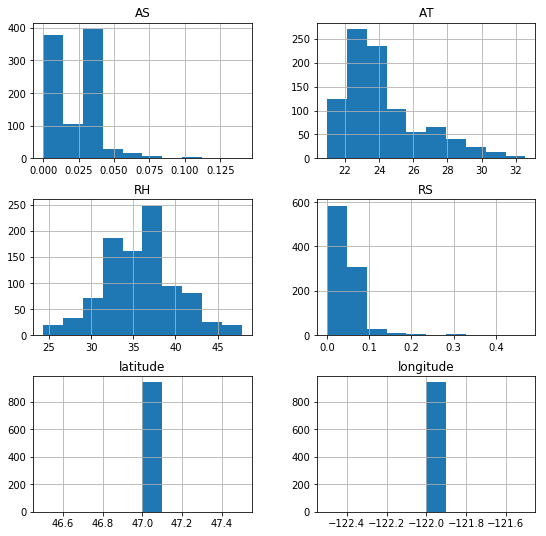

In [81]:
df.hist(figsize=(9, 9))

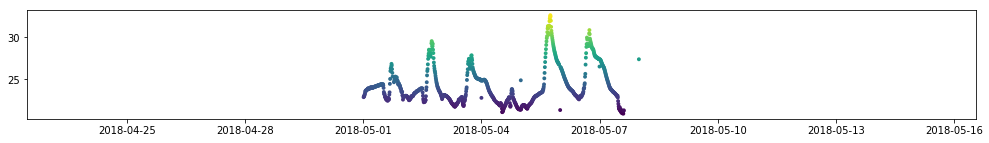

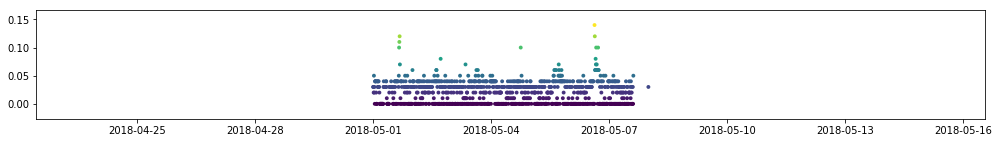

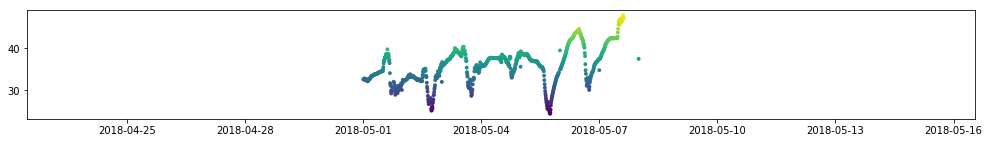

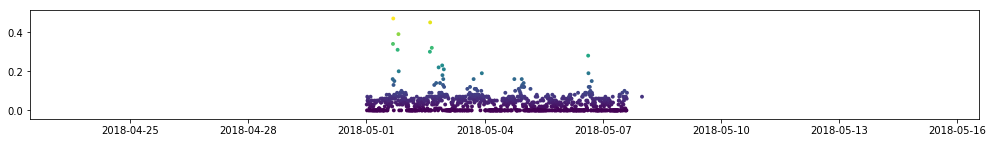

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['AT'], s=15, c=df['AT'], marker='o', edgecolor='none')
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['AS'], s=15, c=df['AS'], marker='o', edgecolor='none')
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['RH'], s=15, c=df['RH'], marker='o', edgecolor='none')
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['RS'], s=15, c=df['RS'], marker='o', edgecolor='none')


In [53]:
import metpy